## Load in the modules 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt
from matplotlib import colors, colorbar
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cf
import cfplot as cfp
import xclim
import pandas as pd
from cartopy.util import add_cyclic_point

from nc_processing import *
from analysis import * 

%matplotlib inline


Redefining 'delta_degC' (<class 'pint.definitions.UnitDefinition'>)
Redefining 'Δcelsius' (<class 'pint.definitions.UnitDefinition'>)
Redefining 'degC' (<class 'pint.definitions.UnitDefinition'>)
Redefining 'celsius' (<class 'pint.definitions.UnitDefinition'>)
Redefining 'C' (<class 'pint.definitions.UnitDefinition'>)
Redefining 'd' (<class 'pint.definitions.UnitDefinition'>)
/home/users/madhkri/.conda/envs/climate_39/lib/python3.9/site-packages/xarray/core/options.py:67: FutureWarning: The enable_cftimeindex option is now a no-op and will be removed in a future version of xarray.
  warnings.warn(



## Define the directory and filename from specifications

In [3]:
# define the data directory to search for files using lists
ceda_dir='/badc/cmip6/data/CMIP6/{project}/{centre}/{model}/{exp}/{run}/{domain}/{var}/gn/latest/'
# define the base of the filename for the output file(s) using lists, note this matches the file format in the data directory except for the date_4_file section and the missing .nc. 
out_base='{var}_{domain}_{model}_{exp}_{run}_gn_{time_range}' # all that's missing is a .nc but we can add that later.

In [4]:
data_dir='/home/users/madhkri/data/' # !!!!!!!!!!!!! CHANGE THIS !!!!!!!!!!!!!!!!!!

model='UKESM1-0-LL'
centre='MOHC'

var='siconc'
domain='SImon'

exp='G6sulfur'
project='GeoMIP'

run='r1i1p1f2'

grid='gn'

season='ANN'
dates=['2045-01-01','2054-01-01']

time_files=1

# load the arguments into a list then... 
args=[season,dates,data_dir,model,centre,var,domain,exp,project,run,grid,time_files]
ds_mean, ds_std = get_seasonal_mean_std(*args) # ... unpack them into the function.





loading existing files siconc_SImon_UKESM1-0-LL_G6sulfur_r1i1p1f2_gn_2045-01-01_2054-01-01 ANN


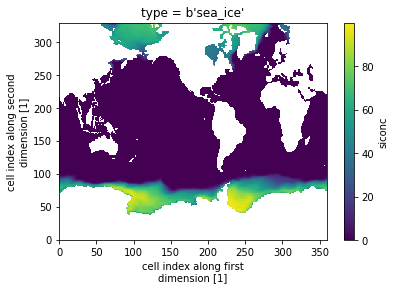

In [5]:
ds_mean[var].plot()

In [6]:
lat2d = ds_mean['latitude']


In [7]:
lon2d = ds_mean['longitude']
lon1d = lon2d.isel(j=0)

In [8]:
lon1d.values

array([ 7.35000000e+01,  7.45000000e+01,  7.55000000e+01,  7.65000000e+01,
        7.75000000e+01,  7.85000000e+01,  7.95000000e+01,  8.05000000e+01,
        8.15000000e+01,  8.25000000e+01,  8.35000000e+01,  8.45000000e+01,
        8.55000000e+01,  8.65000000e+01,  8.75000000e+01,  8.85000000e+01,
        8.95000000e+01,  9.05000000e+01,  9.15000000e+01,  9.25000000e+01,
        9.35000000e+01,  9.45000000e+01,  9.55000000e+01,  9.65000000e+01,
        9.75000000e+01,  9.85000000e+01,  9.95000000e+01,  1.00500000e+02,
        1.01500000e+02,  1.02500000e+02,  1.03500000e+02,  1.04500000e+02,
        1.05500000e+02,  1.06500000e+02,  1.07500000e+02,  1.08500000e+02,
        1.09500000e+02,  1.10500000e+02,  1.11500000e+02,  1.10252754e+02,
        1.10915749e+02,  1.11564079e+02,  1.12199333e+02,  1.12823067e+02,
        1.13436760e+02,  1.14041794e+02,  1.14639435e+02,  1.15230888e+02,
        1.15817230e+02,  1.16399490e+02,  1.16978600e+02,  1.17555435e+02,
        1.18130814e+02,  

ValueError: The coordinate must be equally spaced.

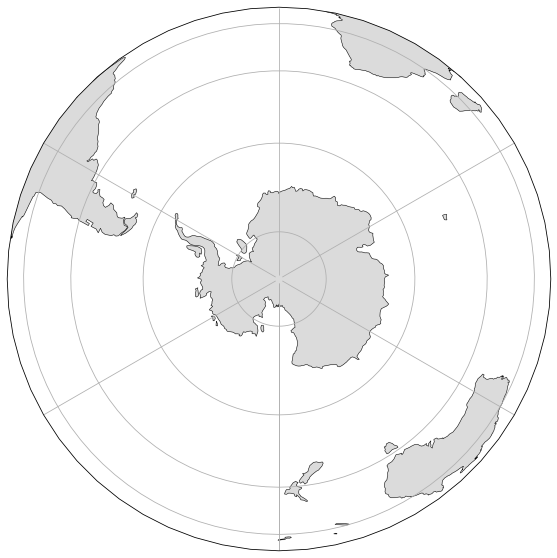

In [9]:
cmap=plt.get_cmap('rainbow')
projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)

transform=ccrs.PlateCarree()

bounds = np.linspace(0, 100, 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)



plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=-90.0))
ax.add_feature(cartopy.feature.LAND, zorder=1,facecolor=cartopy.feature.COLORS['land_alt1'])
ax.coastlines(resolution='110m', linewidth=0.5)
ax.gridlines()


lon_idx = ds_mean['siconc'].dims.index('i')
wrap_data, wrap_lon = add_cyclic_point(ds_mean['siconc'].values, coord=lon1d, axis=lon_idx)

fig=ax.pcolormesh(wrap_lon,lat2d,wrap_data, transform=transform,cmap=cmap,norm=norm)

#add bounday of expt_b
#ax.contour(lon_nh,lat_nh,expt_b, colors='black', levels=[1], linewidth=4, transform=transform)

cax,kw = colorbar.make_axes(ax, location='bottom',pad=0.05,shrink=0.7, label = 'Sea Ice Concentration (%)')

plt.colorbar(fig,cax=cax,**kw)

In [10]:
wrap_data

NameError: name 'wrap_data' is not defined

## Anomaly plot

In [11]:
model='UKESM1-0-LL'
centre='MOHC'

var='siconc'
domain='SImon'

exp='historical'
project='CMIP'

run='r1i1p1f2'

grid='gn'

season='ANN'
dates=['1970-01-01','1999-01-01']


args=[season,dates,data_dir,model,centre,var,domain,exp,project,run,grid,time_files]
ds_mean_2, ds_std_2 = get_seasonal_mean_std(*args) # ... unpack them into the function.

lat2d2 = ds_mean_2['latitude']
lon2d2 = ds_mean_2['longitude']


loading existing files siconc_SImon_UKESM1-0-LL_historical_r1i1p1f2_gn_1970-01-01_1999-01-01 ANN


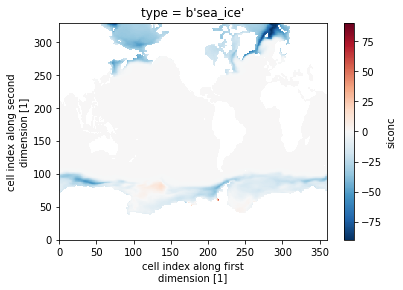

In [12]:
ds_anomaly = (ds_mean[var] - ds_mean_2[var])
ds_anomaly.plot()

/home/users/madhkri/.conda/envs/climate_39/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1702: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,



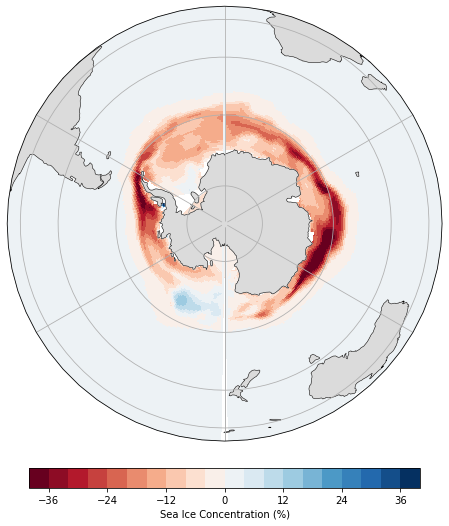

In [13]:
cmap=plt.get_cmap('rainbow')
projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)

transform=ccrs.PlateCarree()

bounds = np.linspace(-40, 40, 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)



plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=-90.0))
ax.add_feature(cartopy.feature.LAND, zorder=1,facecolor=cartopy.feature.COLORS['land_alt1'])
ax.coastlines(resolution='110m', linewidth=0.5)
ax.gridlines()

fig=ax.pcolormesh(lon2d, lat2d, (ds_mean[var] - ds_mean_2[var]), transform=transform,cmap='RdBu',norm=norm)


#add bounday of expt_b
#ax.contour(lon_nh,lat_nh,expt_b, colors='black', levels=[1], linewidth=4, transform=transform)

cax,kw = colorbar.make_axes(ax, location='bottom',pad=0.05,shrink=0.7, label = 'Sea Ice Concentration (%)')

plt.colorbar(fig,cax=cax, **kw)


